### MATH 596 - Climate Mathematics

### Assignment No : 3 - Bhagyashri Patil

In [ ]:
import numpy as np 
import pandas as pd
import warnings
import os
warnings.filterwarnings("ignore")
import plotly.express as px 
import sympy as sm
import math as m
import os
import netCDF4 as nc

import matplotlib
from matplotlib import cm as cm1
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon
import matplotlib.animation as animation
#from mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic

from datetime import datetime

import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from sklearn import datasets, linear_model

from scipy import optimize as opt
from scipy.ndimage import gaussian_filter

from tkinter import *
import time
import csv

ImportError: cannot import name 'artist' from 'matplotlib' (C:\Users\layth\AppData\Roaming\Python\Python38\site-packages\matplotlib\__init__.py)

In [ ]:
#Function that creates personalized discrete Colormap
import numpy as np 
from matplotlib import cm as cm1
from matplotlib.colors import ListedColormap, to_rgba

def newColMap(colors):
    """
    This function creates a new color map from a list of colors given
    as a parameter. Recommended length of list of colors is at least 6.
    """
    first = np.repeat([to_rgba(colors[0])], 2, axis = 0)
    last = np.repeat([to_rgba(colors[-1])], 2, axis = 0)
    v = cm1.get_cmap('viridis', 16*(len(colors)-2))
    newcolors = v(np.linspace(0, 1, 16*(len(colors)-2)))
    for (i, col) in enumerate(colors[1:-1]):
        newcolors[16*i : 16*(i+1), :] = to_rgba(col)
    return ListedColormap(np.append(np.append(first,newcolors, axis=0), last, axis=0))


In [ ]:
##################################################
# CHAPTER - 9 (Problems 9.1 to 9.3, 9.6 to 9.9) ##
##################################################

###  Problem 9.1  --  
###### Use python to plot the surface air temperature (SAT) and sea level pressure (SLP) anomaly time series of Tahiti and Darwin. put the four time series on the same figure, and explain their behaviors during the El Ni ̃no and La Ni ̃na periods. You may use the NECP/NCAR Reanalysis surface data for the Darwin and Tahiti grid boxes.

In [ ]:
slpTahiti = pd.read_csv("SLPdarwin.csv")
slpDarwin = pd.read_csv("SLPtahiti.csv")


slpanomtah = pd.DataFrame(slpTahiti)
slpanomdar = pd.DataFrame(slpDarwin)

slptah = np.array(slpanomtah.iloc[:, 1:])
x1 = np.reshape(slptah,(780,1))

sldar = np.array(slpanomdar.iloc[:, 1:])
x2 = np.reshape(sldar,(780,1))

time = np.linspace(1951,2015, len(x1))

In [ ]:
#SAT - Other 
noaa_file = 'NOAAGlobalT.csv'
SATtemp = pd.read_csv(noaa_file)

satanomtah = pd.DataFrame(SATtemp)
sattah = np.array(satanomtah.iloc[1041, 855:1635])
x3 = np.reshape(sattah, (780,1))

satdar = np.array(satanomtah.iloc[1109, 855:1635])
x4 = np.reshape(satdar, (780, 1))

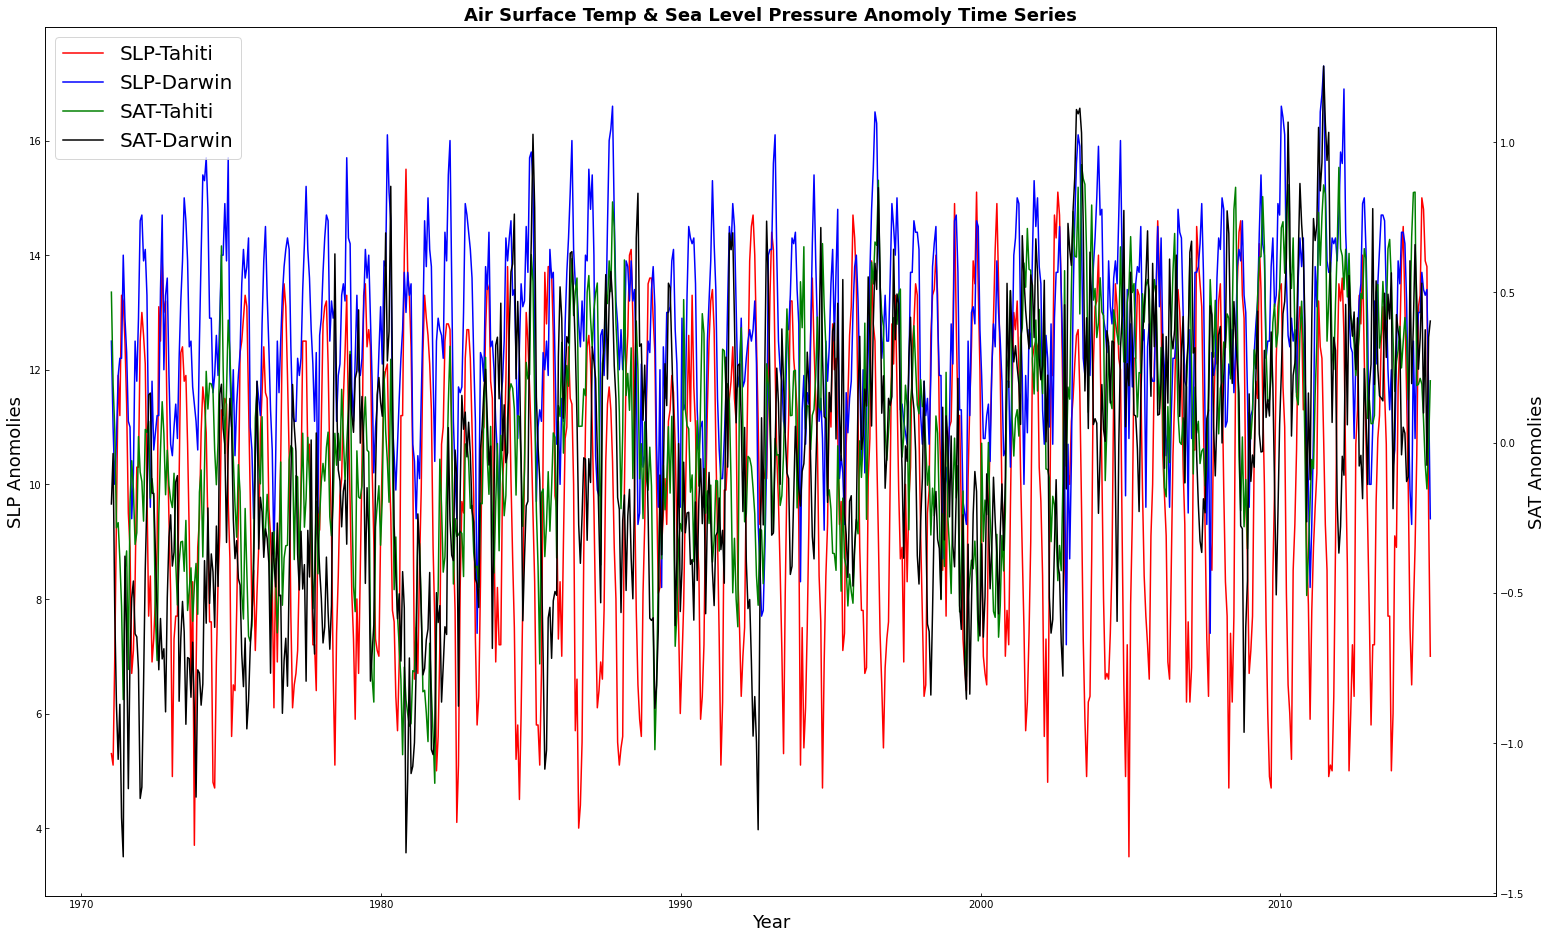

In [ ]:
# set up figure
fig, ax = plt.subplots(1,1,figsize=(26, 16))

# plot data 
ax.plot(time, x1, 'r', label="SLP-Tahiti")

# set labels 
ax.set_ylabel("SLP Anomolies", size=18)
ax.set_xlabel("Year", size=18)
ax.set_title("Air Surface Temp & Sea Level Pressure Anomoly Time Series", size=18, fontweight="bold")

#plt.yticks(rotation=90, size=18)
#plt.xticks(size=18)

# creates twin axis 
#ax1 = ax.twinx()

# plot of twin axis 
ax.plot(time, x2, 'b', label="SLP-Darwin")

ax1 = ax.twinx()
ax1.plot(time, x3, 'g', label="SAT-Tahiti")
ax1.set_ylabel("SAT Anomolies", size=18)
#ax2.set_ylabel("Anomolies - SAT Tahiti")

#ax1 = ax.twinx()
ax1.plot(time, x4, 'k', label="SAT-Darwin")
#ax3.set_ylabel("Anomolies - SAT Darwin")

#plt.yticks(rotation=90, size=18)

hand1, lab1 = ax.get_legend_handles_labels()
hand2, lab2 = ax1.get_legend_handles_labels()

ax.legend(handles=hand1+hand2, labels=lab1+lab2,
          loc='upper left', prop={'size': 20});

#ax.legend(loc=(0.1, .89))

ax1.tick_params(direction='in')
ax.tick_params(direction='in')

# show plot 
plt.show()

In [ ]:
'''
# set up figure
fig, ax = plt.subplots(1,1,figsize=(26, 16))

# plot data 
ax.plot(time, x1, 'r', label="SLP-Tahiti")

# set labels 
ax.set_ylabel("Anomolies", size=18)
ax.set_xlabel("Year", size=18)
ax.set_title("Air Surface Temp & Sea Level Pressure Anomoly Time Series", size=18, fontweight="bold")

#plt.yticks(rotation=90, size=18)
#plt.xticks(size=18)

# creates twin axis 
ax1 = ax.twinx()

# plot of twin axis 
ax.plot(time, x2, 'b', label="SLP-Darwin")
ax.set_ylabel("Anomolies ")

ax2 = ax.twinx()
ax.plot(time, x3, 'g', label="SAT-Tahiti")
#ax2.set_ylabel("Anomolies - SAT Tahiti")

ax3 = ax.twinx()
ax.plot(time, x4, 'k', label="SAT-Darwin")
#ax3.set_ylabel("Anomolies - SAT Darwin")

#plt.yticks(rotation=90, size=18)



plt.legend(loc=(0.1, .89))

#ax1.tick_params(direction='in')
#ax.tick_params(direction='in')

# show plot 
plt.show()
'''

We see more cases of hotter temperatures occuring during these more recent time periods for El Nino and La Nina. We also see that as years continue forward that farther outlier valued points become more common, as seen in the graph of later years having points of the line stretched farther out. The graph shows SLP values creating more extreme values as mentioned before hand. The SAT values seem to have a more precise pattern and are more closely pact together.

###  Problem 9.2  -- 
###### (a) Use R to compute the 1971-2000 January climatology of the SAT from the NCEP/NCAR Reanalysis data for each grid box. Plot the climatology map.
###### (b) Perform the same procedure for June.

In [ ]:
#a.)
datamat = nc.Dataset("./data/air.mon.mean.nc") #SAT

Lon = datamat.variables['lon'][:]
Lat = datamat.variables['lat'][:]
Time = datamat.variables['time']
precnc = datamat.variables['air']

In [ ]:
june = precnc[(Time[6]-Time[5])/24] #June
jan = (Time[1]-Time[0])/24 #Janurary

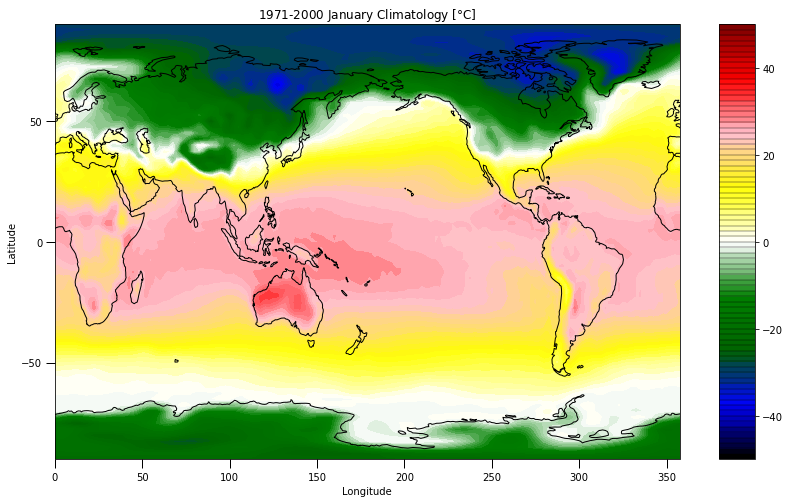

In [ ]:
# set up variables for map
# number of colors that correspond to data values
contour_levels = np.linspace(-50,50,81)
# create color palette
myColMap = LinearSegmentedColormap.from_list(name='my_list', colors=['black','blue','darkgreen','green','white','yellow','pink','red','maroon'], N=100)

JMon = precnc[12*np.arange(68)]
JMon = JMon[-45:-30]
#JMon = precnc[-45:-30]
#sdmat = np.std(precnc, axis=0)
climmat = np.mean(JMon, axis=0)
#print(climmat)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

# set up figure
fig, ax = plt.subplots(figsize=(14,8))

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_title("1971-2000 January Climatology [$\degree$C]")

# plot data
contf = ax.contourf(Lon-180, Lat, climmat, levels1, cmap=myColMap)

# add colorbar and labels
colbar = plt.colorbar(contf, drawedges=True, aspect=12, ticks=[])
colbar.set_ticks([20*i for i in range(-2, 3)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=cartopy.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=cartopy.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)

# show plot 
fig.show()

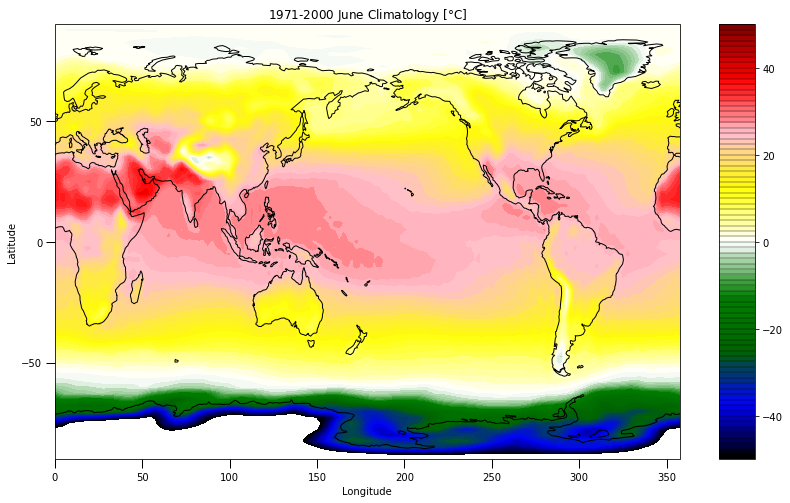

In [ ]:
#b.) - JUNE

# set up variables for map
# number of colors that correspond to data values
contour_levels = np.linspace(-50,50,81)
# create color palette
myColMap = LinearSegmentedColormap.from_list(name='my_list', colors=['black','blue','darkgreen','green','white','yellow','pink','red','maroon'], N=100)

JMon = precnc[12*np.arange(68)+5]
JMon = JMon[-45:-30]
#JMon = precnc[-45:-30]
#sdmat = np.std(precnc, axis=0)
climmat = np.mean(JMon, axis=0)
#print(climmat)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

# set up figure
fig, ax = plt.subplots(figsize=(14,8))

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_title("1971-2000 June Climatology [$\degree$C]")

# plot data
contf = ax.contourf(Lon-180, Lat, climmat, levels1, cmap=myColMap)

# add colorbar and labels
colbar = plt.colorbar(contf, drawedges=True, aspect=12, ticks=[])
colbar.set_ticks([20*i for i in range(-2, 3)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=cartopy.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=cartopy.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)

# show plot 
fig.show()

###  Problem 9.3 --
###### (a) Use R to compute the 1971-2000 January standard deviation of the SAT from the NCEP/NCAR Reanalysis data for each grid box. Plot the climatology map.
###### (b) Perform the same procedure for June.

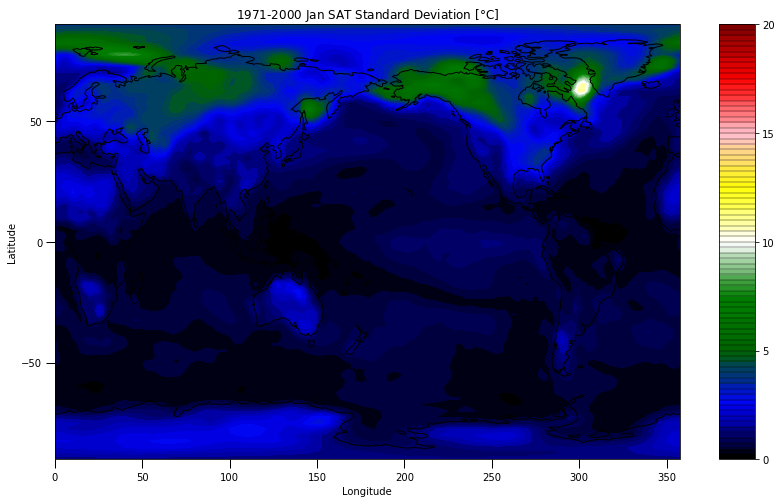

In [ ]:
#a.) 
# plot the standard deviation
# set up figure 

JMon = precnc[12*np.arange(68)]
JMon = JMon[-45:-30]
#JMon = precnc[-45:-30]
sdmat = np.std(JMon, axis=0)
#climmat = np.mean(JMon, axis=0)
#print(climmat)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

fig, ax = plt.subplots(figsize=(14,8))

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_title("1971-2000 Jan SAT Standard Deviation [$\degree$C]")

# plot data
contf = ax.contourf(Lon-180, Lat, sdmat, levels2, cmap=myColMap)

# add colorbar nd labels
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([5*i for i in range(5)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=cartopy.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=cartopy.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)

# show and save figure 
fig.savefig("CH9;JanuarySTD.jpg", bbox_inches='tight');

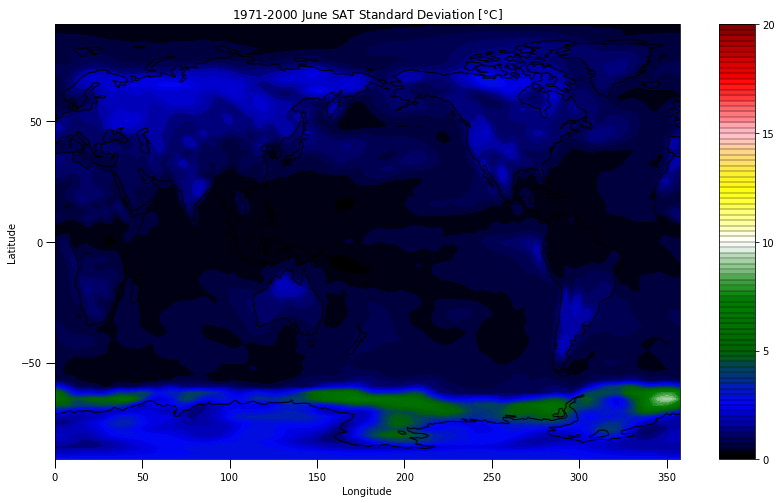

In [ ]:
#b.) -  JUNE 
# plot the standard deviation
# set up figure 

JMon = precnc[12*np.arange(68)+5]
JMon = JMon[-45:-30]
#JMon = precnc[-45:-30]
sdmat = np.std(JMon, axis=0)
#climmat = np.mean(JMon, axis=0)
#print(climmat)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

fig, ax = plt.subplots(figsize=(14,8))

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_title("1971-2000 June SAT Standard Deviation [$\degree$C]")

# plot data
contf = ax.contourf(Lon-180, Lat, sdmat, levels2, cmap=myColMap)

# add colorbar nd labels
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([5*i for i in range(5)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=cartopy.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=cartopy.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)

# show and save figure 
fig.savefig("CH9;JanuarySTD.jpg", bbox_inches='tight');

###  Problem 9.6 --
###### (a) Use R and NCEP/NCAR Reanalysis data to display the El Ni ̃no temperature anomaly for January 2016 with respect to the 1971–2000 climatology.
###### (b) Find the latitude and longitude of the grid box on which the maximum temperature anomaly of the month occurred. What was the maximum anomaly? Where did it occur?

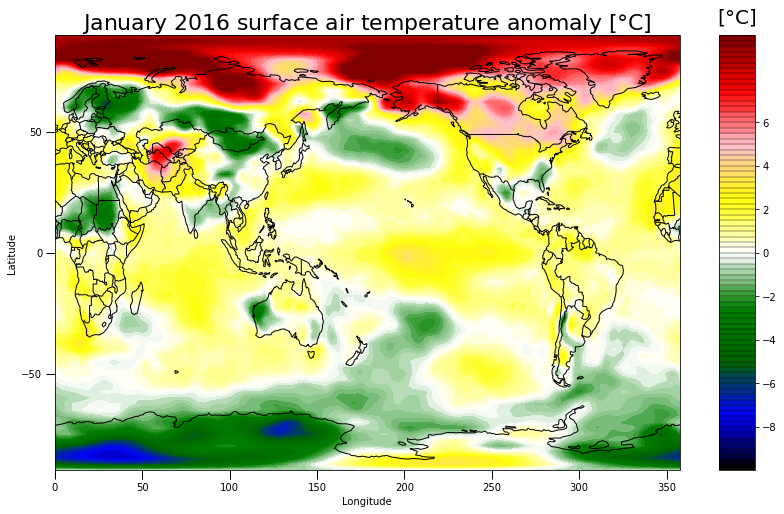

In [ ]:
# plot the January 2016 anomaly from NCEP data
# create variables
JMon = precnc[12*np.arange(68)]
JMon = JMon[-45:-30]

climmat = np.mean(JMon, axis=0)

levels1 = np.linspace(-10, 10, 81)
anomat = precnc[816,:,:] - climmat


# supress values into (-10,10) range
for i in range(73):
    for j in range(144):
        if anomat[i,j] > 10:
            anomat[i,j] = 10
        if anomat[i,j] < -10:
            anomat[i,j] = -10


# set up figure            
fig, ax = plt.subplots(figsize=(14,8))

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black')
ax.set_title("January 2016 surface air temperature anomaly [$\degree$C]", size=22)

# plot data
contf = ax.contourf(Lon-180, Lat, anomat, levels1, cmap=myColMap)

# add colorbar and labels 
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([2*i for i in range(-4, 4)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=cartopy.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=cartopy.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

plt.text(199,95,"[$\degree$C]", size=20)
ax.tick_params(length=9, width=1)

# show figure 
fig.show()

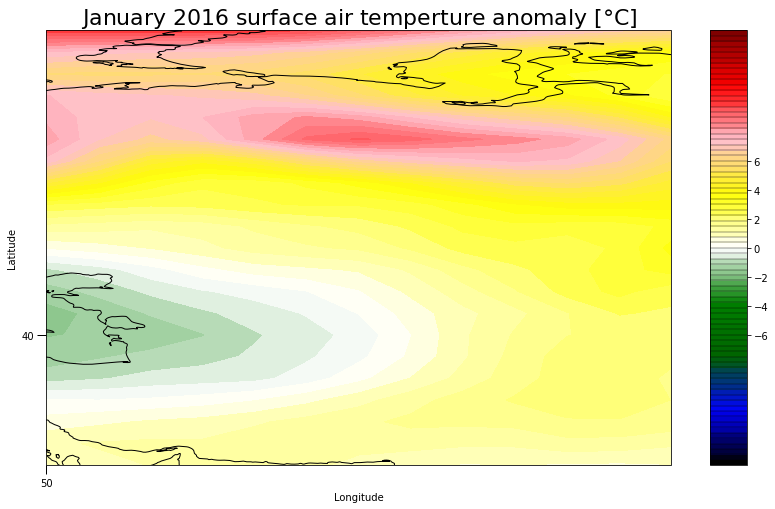

In [ ]:
#b.)

# create and prepare variables 
myslice = range(144)
anomat = anomat[:,myslice]
int1 = np.linspace(-15,15,81)

# set up figure
fig, ax = plt.subplots(figsize=(14,8))

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=25))
ax.coastlines()
ax.set_title("January 2016 surface air temperture anomaly [$\degree$C]", size=22)

# plot contour 
contf = ax.contourf(Lon-180, Lat, anomat, int1, cmap=myColMap)

# add colorbar and labels
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([2*i for i in range(-3, 4)])
ax.set_aspect('auto')

ax.set_yticks([20*i for i in range(-3, 3)],crs=cartopy.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=cartopy.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.set_extent([50,80,75,25],crs=cartopy.crs.PlateCarree())
ax.tick_params(length=9, width=1)

#plt.text(112,53,"[$\degree$C]", size=20)

# show figure
fig.show()

The Latitude Longitude is (based on the X and Y measurements of the graph from part a.) is Latitude of 80N and Longitude of 175E. This shows the highest anomoly value change to occur, which is about a value of 7, and is located at the upper north of the world around northeast of the frozen Russian tundra.

###  Problem 9.7 --
###### (a) Compute the global average monthly mean SAT from January 1948 to December 2015 using the NCEP/NCAR Reanalysis data.
###### (b) Plot the time series.
###### (c) Compute the temporal mean of this time series.

In [ ]:
#a.)



###  Problem 9.8 --
###### (a) Compute the global average monthly mean SAT anomalies from 1948 to 2015 for January with respect to the 1971–2000 January climatology, using the NCEP/NCAR Reanalysis data.
###### (b) Plot the time series and its linear trend on the same figure.

In [ ]:
#a.)
ncd = nc.Dataset("air.mon.mean.nc","r+")

#Define variables
lon_vals = ncd.variables['lon']
lat_vals = ncd.variables['lat']
time = ncd.variables['time']
air = ncd.variables['air']
time_unit = time.units
precnc = ncd.variables['air']

In [ ]:
# define Variables 
precst = np.zeros((10512,826))

temp = np.reshape(precnc[0,:,:],(144*73))
#print(np.shape(temp))
#print(temp[0:6])

# create reshaping function
def spmat(x,y):
    for i in range(0,826):
        y[:,i] = np.reshape(x[i,:,:],(144*73))
    return y

# use fuction and save result
precst2 = spmat(precnc,precst)

#print(np.shape(precst2))

# build lat and lon for 10512 spatial positions using rep
def rep(x,y,n):
    for j in range(0,n):
        x = np.append(x,y)
    return x

arra = np.zeros((0))
LAT = rep(arra,lat_vals,144)
LON = rep(arra,lon_vals[0],73)
#print(LON)

# create reconstruct function
def recon():
    rslt = LON
    for jj in range(0,143):
        rslt = np.append(rslt,rep(arra,lon_vals[jj],73))
    return rslt
LON2 = recon()
#print("The last 6 entries are:",LON2[-6:])

# creating an array with first two columns of lat and lon
# with 826 months spanning from 1948-2016
gpcpst_ = np.column_stack((LAT,(LON2)))
gpcpst = np.column_stack((gpcpst_,precst2))



In [ ]:
# create an array of all ones for the days of the data
ones = np.ones(826)

# define a function to create a list of months repeating to match
# the size of our data
def monthfunc():
    montharr = np.zeros(0)
    for i in range(1,71):
        for j in range(1,13):
             montharr = np.append(montharr,int(j))
    for k in range(1,6):
        montharr = np.append(montharr,int(k))
    return montharr

months = monthfunc()

# define a functionto create a list of years to match the
# size of our data
def yearfunc():
    yeararr = np.zeros(0)
    for i in range(1948,2018):
        for j in range(1,13):
            yeararr = np.append(yeararr,i)
    for k in range(1,6):
        yeararr = np.append(yeararr,2018)
    return yeararr

years = yearfunc()

# define a function that pairs a string version of our year and
# month arrays with a dash in between these will serve as our column names for our data
def tmfunc():
    empty = np.zeros(0)
    for i in range(0,826):
        empty = np.append(empty,str(years[i])  + '-'  + str(months[i]))
    return empty

tm1 = tmfunc()

# add the 'Lat' and 'Lon' columns to the beginning
# of our column names array
tm2 = np.append(['Lat','Lon'],tm1)

# EOF from de-trended data
GPCPST = pd.DataFrame(gpcpst,columns=tm2)

monJ = np.array(range(0,816))
gpcpdat = GPCPST.iloc[:,2:828]
gpcpJ = gpcpdat.iloc[:,monJ]
climJ = gpcpJ.mean(axis=1)
sdJ = gpcpJ.std(axis=1)

# create desired variables for de-trended data
anomJ = ((gpcpdat.iloc[:,monJ].T-climJ)/sdJ).T
vArea = np.cos(np.multiply((gpcpst[:,0]),np.pi/180.))
anomA = np.multiply(vArea,anomJ.T)

# compute the de-trended data
JanSAT = anomA.T.sum(axis=0)/vArea.sum()

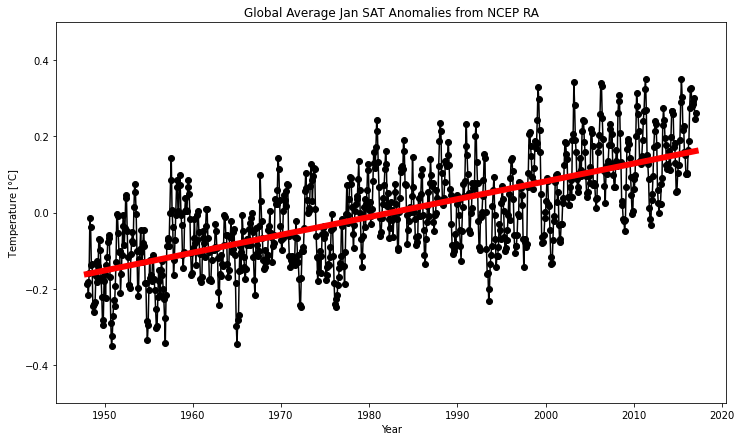

In [ ]:
#b.)
#Redefine Variables
JMon = precnc[12*np.arange(68)]
JMon = JMon[-45:-30]

climmat = np.mean(JMon, axis=0)

levels1 = np.linspace(-10, 10, 81)
anomat = precnc[816,:,:] - climmat


# set up figure 
plt.figure(figsize=(12,7))

# create time variable
TIME = np.linspace(1948,2017, 816)
#new = climmat - JanSAT
# create linear regression object
lm = linear_model.LinearRegression()
lm.fit(TIME.reshape(-1,1), JanSAT)
pred = lm.predict(TIME.reshape(-1,1))


# plot data 
plt.plot(TIME, JanSAT, "-ok")


# set labels 
plt.title("Global Average Jan SAT Anomalies from NCEP RA")
#plt.text(1950,0.35,"Linear Trend ${}\degree$C/100a".format(np.round(lm.coef_,3)[0]*100), color="r", fontsize=18)
ax = plt.gca()
ax.set_ylim([-0.5, 0.5])
# plot linear regression
plt.plot(TIME, pred, "-",color="red", linewidth=6)
plt.ylabel("Temperature [$\degree$C]")
plt.xlabel("Year")

plt.show()

###  Problem 9.9 --
###### Use R to plot the map of North America and plot the December 1997 SAT anomaly data with respect to the 1971–2000 December climatology on this map. Choose your own gridded dataset from the Internet, such as the NOAAGlobalTemp dataset used in this book.

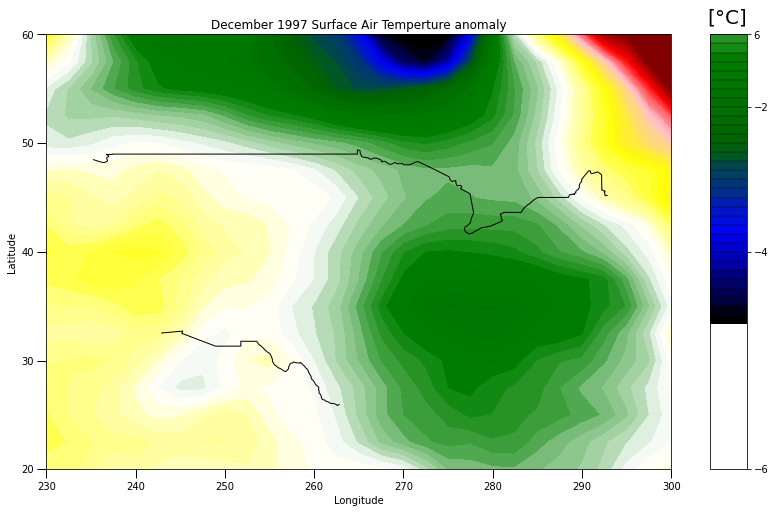

In [ ]:
#Zoom in to a specific lat-lon region: Pacific
datamat = nc.Dataset("air.mon.mean.nc")
ncd = datamat
Lon = datamat.variables['lon'][:]
Lat = datamat.variables['lat'][:]
Time = datamat.variables['time']
precnc = datamat.variables['air']


# prepare data 
DMon = list(12*np.arange(68)+11)
DMon = DMon[-45:-30]
climmat = np.zeros((144,73))
for i in range(144):
    for j in range(73):
        climmat[i,j] = np.mean(precnc[DMon,j,i])

anomat = precnc[420+12*15-1,:,:] - climmat.T

# suppress values into the (-5,5) range 
for i in range(73):
    for j in range(144):
        if anomat[i,j] > 5:
            anomat[i,j] = 5
        if anomat[i,j] < -5:
            anomat[i,j] = -5
            
matdiff = anomat
int1 = np.linspace(-5,5,81)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 15, 81)

contour_levels = np.linspace(-50,50,81)
# create color palette
myColMap = LinearSegmentedColormap.from_list(name='my_list', 
                                             colors=['black','blue','darkgreen','green','white','yellow',
                                                     'pink','red','maroon'], N=100)


#Fig 9.12(b)
# set up figure 
fig, ax = plt.subplots(figsize=(14,8))

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=250))
ax.coastlines()
ax.set_title("December 1997 Surface Air Temperture anomaly")

# plot data 
contf = ax.contourf(Lon-180, Lat, matdiff, int1, cmap=myColMap)

# add colorbar and labels 
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([2*i for i in range(-3, 4)])
ax.set_aspect('auto')

ax.set_yticks([10*i for i in range(2, 7)],crs=cartopy.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([200+i*(10) for i in range(3,11)], crs=cartopy.crs.PlateCarree())
ax.set_xticklabels([200+i*(10) for i in range(3,11)])
ax.set_xlabel("Longitude")

ax.set_extent([230,300,20,60],crs=cartopy.crs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, edgecolor='black')
ax.tick_params(length=9, width=1)

plt.text(54,61,"[$\degree$C]", size=20)

# show figure 
fig.show()

In [ ]:
##################################################
###### CHAPTER - 10 (Problems 10.1 to 10.7) ######
##################################################

###  Problem 10.1 --
###### (a) Use R to compute the December SAT climatology based on the 1961–1990 NCEP/NCAR Reanalysis 1 SAT data on a 2.5◦ ×2.5◦ grid.
###### (b) Use R to plot the climatology map.

<b>NOTE: The Coastlines for my maps have been messed up as an issue occured with my matplotlib library that affected my cartopy library. It has both been reinstalled but now Ax.Coastlines() do not work for my mapping graphs anymore. So I do apologize for this inconvinience. Trying to fix it again may cause more issues with the libraries to occue that I would like to avoid and continuw my work as is.</b>

In [ ]:
datamat = nc.Dataset("./data/air.mon.mean.nc") #SAT

Lon = datamat.variables['lon'][:]
Lat = datamat.variables['lat'][:]
Time = datamat.variables['time']
precnc = datamat.variables['air']

#a.)

# set up variables for map
# number of colors that correspond to data values
contour_levels = np.linspace(-50,50,81)
# create color palette
myColMap = LinearSegmentedColormap.from_list(name='my_list', colors=['purple','blue','darkgreen','green','white','orange','pink','red','maroon'], N=100)

JMon = precnc[12*np.arange(68)+11]
JMon = JMon[-45:-30]
#JMon = precnc[-55:-40]
#sdmat = np.std(precnc, axis=0)
climmat = np.mean(JMon, axis=0)
#print(climmat)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

# set up figure
fig, ax = plt.subplots(figsize=(14,8))


'''
# using the basemap package to put the cylindrical projection map into the image
trend = Basemap(projection='cyl',llcrnrlat=-90.,urcrnrlat=90.,llcrnrlon=0.,urcrnrlon=360.,resolution='c')

# draw coastlines, latitudes, and longitutes on the map
trend.drawcoastlines(color='black', linewidth=1)
trend.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1], fontsize=17)
trend.drawmeridians(np.arange(-180.,181.,60.), labels= [1,0,0,1], fontsize=17)
trend.drawcountries()

'''

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_title("1961-1999 December Climatology [$\degree$C]")

# plot data
contf = ax.contourf(Lon-180, Lat, climmat, levels1, cmap=myColMap)

# add colorbar and labels
colbar = plt.colorbar(contf, drawedges=True, aspect=12, ticks=[])
colbar.set_ticks([20*i for i in range(-2, 3)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=cartopy.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=cartopy.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)

# show plot 
fig.show()

NameError: name 'nc' is not defined

###  Problem 10.2 --
###### (a) Use R to compute the December SAT standard deviation based on the 1961–1990 NCEP/NCAR Reanalysis 1 SAT data on a 2.5◦ ×2.5◦ grid. 
###### (b) Use R to plot the standard deviation map.

In [ ]:
#a.) & b.)
# plot the standard deviation
# set up figure 

JMon = precnc[12*np.arange(68)+11]
JMon = JMon[-55:-40]
#JMon = precnc[-45:-30]
sdmat = np.std(JMon, axis=0)
#climmat = np.mean(JMon, axis=0)
#print(climmat)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

fig, ax = plt.subplots(figsize=(14,8))
myColMap = LinearSegmentedColormap.from_list(name='my_list', colors=['purple','blue','darkgreen','green','white','orange','pink','red','maroon'], N=100)

ax = plt.subplot(111, projection=cartopy.crs.PlateCarree(central_longitude=180))
ax.coastlines()
ax.set_title("1961-1990 Jan SAT Standard Deviation [$\degree$C]")

# plot data
contf = ax.contourf(Lon-180, Lat, sdmat, levels2, cmap=myColMap)

# add colorbar nd labels
colbar = plt.colorbar(contf, drawedges=True, aspect=12)
colbar.set_ticks([5*i for i in range(5)])
ax.set_aspect('auto')

ax.set_yticks([50*i for i in range(-1, 2)],crs=cartopy.crs.PlateCarree())
ax.set_ylabel("Latitude")

ax.set_xticks([50*i for i in range(8)], crs=cartopy.crs.PlateCarree())
ax.set_xticklabels([50*i for i in range(8)])
ax.set_xlabel("Longitude")

ax.tick_params(length=9, width=1)

# show and save figure 
fig.savefig("CH9;JanuarySTD.jpg", bbox_inches='tight');

NameError: name 'precnc' is not defined

###  Problem 10.3 --
###### (a) Use R to compute the December SAT anomalies from 1948 to 2015 based on the 1961–1990 climatology from the NCEP/NCAR Reanalysis 1 SAT data on a 2.5◦ ×2.5◦ grid.
###### (b) Use R to plot the anomalies map for December 1997 and December 1998.
###### (c) Use 100–200 words to describe the El Ni ̃no and La Ni ̃na phenomena you can observe from the plots in Step (b).

In [ ]:
datamat = nc.Dataset("./data/air.mon.mean.nc") #SAT

Lon = datamat.variables['lon'][:]
Lat = datamat.variables['lat'][:]
Time = datamat.variables['time']
precnc = datamat.variables['air']

#a.)

# set up variables for map
# number of colors that correspond to data values
contour_levels = np.linspace(-50,50,81)
# create color palette
myColMap = LinearSegmentedColormap.from_list(name='my_list', colors=['purple','blue','darkgreen','green','white','orange','pink','red','maroon'], N=100)

JMon = precnc[12*np.arange(68)+11]
JMon = JMon[-55:-40]
#JMon = precnc[-55:-40]
#sdmat = np.std(precnc, axis=0)
climmat = np.mean(JMon, axis=0)
#print(climmat)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

In [ ]:
# prepare figure
plt.figure(figsize=(15., 7.))

# using the basemap package to put the cylindrical projection map into the image
trend = Basemap(projection='cyl',llcrnrlat=-90.,urcrnrlat=90.,llcrnrlon=0.,urcrnrlon=360.,resolution='c')

# shifting the data because 
lons2, data3 = trend.shiftdata(lon_vals, datain = mapmat3, lon_0=180)

# draw coastlines, latitudes, and longitutes on the map
trend.drawcoastlines(color='black', linewidth=1)
trend.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1], fontsize=17)
trend.drawmeridians(np.arange(-180.,181.,60.), labels= [1,0,0,1], fontsize=17)
trend.drawcountries()

limits = np.linspace(-1.1,1.1,50)

# plot data 
eof_plt = plt.contourf(np.array(lons2),np.array(lat_vals),data3,limits,cmap = "jet")

# set labels and colorbar
efo = plt.colorbar(eof_plt, ticks=[1,0.5,0,-0.5,-1])
plt.xlabel('Longitude',labelpad = 30)
plt.ylabel('Latitude',labelpad =40)
plt.title('Trend of the NCEP RA1 Jan 1948-2018 \n Anom Temp [$\degree$C/(10a)]')

plt.show()


NameError: name 'Basemap' is not defined

<Figure size 1080x504 with 0 Axes>